In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
texts = data.data
labels = data.target
categories = data.target_names

print(f"Total documents: {len(texts)}")
print(f"Categories: {categories}")


Total documents: 18846
Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


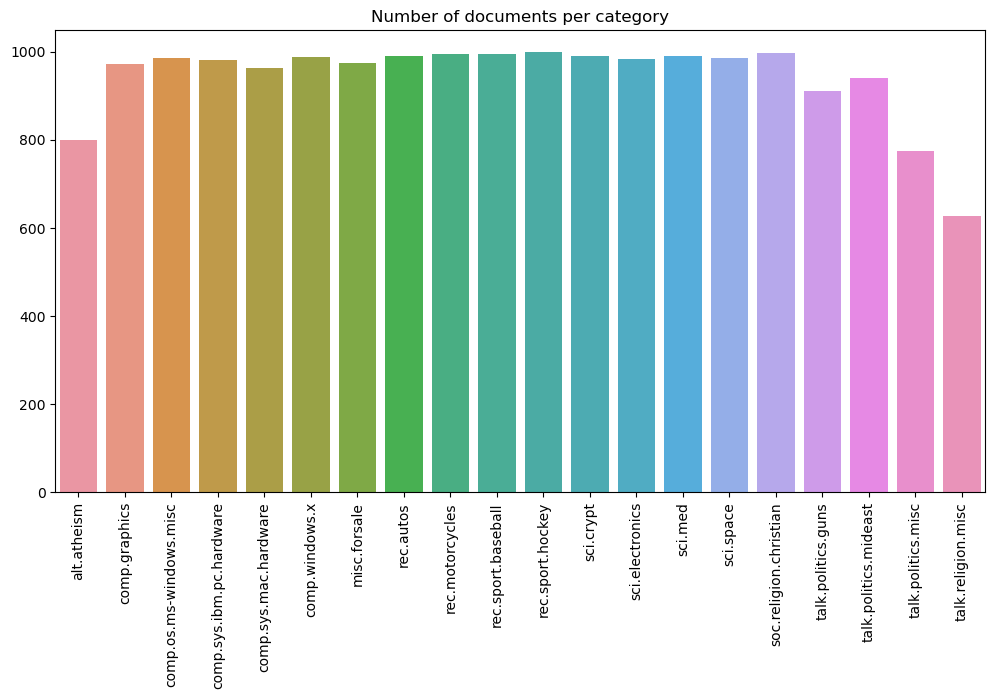

In [11]:
label_counts = pd.Series(labels).value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(x=[categories[i] for i in label_counts.index], y=label_counts.values)
plt.xticks(rotation=90)
plt.title("Number of documents per category")
plt.show()

In [12]:
print("Sample Document:\n")
print(texts[0][:1000])

Sample Document:

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [13]:
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()                          # lowercase
    text = re.sub(r'\d+', '', text)              # remove numbers
    text = re.sub(r'\W+', ' ', text)             # remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # skip lemmatization
    return " ".join(tokens)

In [16]:
print("Preprocessing text...")
clean_texts = [preprocess(doc) for doc in texts]

Preprocessing text...


In [17]:
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(clean_texts)
y = labels

print(f"TF-IDF feature matrix shape: {X.shape}")


TF-IDF feature matrix shape: (18846, 10000)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [20]:
y_pred = model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8658


In [22]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=categories))

Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.83      0.87      0.85       151
           comp.graphics       0.77      0.83      0.80       202
 comp.os.ms-windows.misc       0.81      0.81      0.81       195
comp.sys.ibm.pc.hardware       0.62      0.80      0.70       183
   comp.sys.mac.hardware       0.90      0.84      0.87       205
          comp.windows.x       0.88      0.85      0.86       215
            misc.forsale       0.87      0.73      0.79       193
               rec.autos       0.88      0.94      0.91       196
         rec.motorcycles       0.89      0.92      0.91       168
      rec.sport.baseball       0.97      0.93      0.95       211
        rec.sport.hockey       0.91      0.97      0.94       198
               sci.crypt       0.95      0.96      0.95       201
         sci.electronics       0.91      0.78      0.84       202
                 sci.med       0.97      0.90      

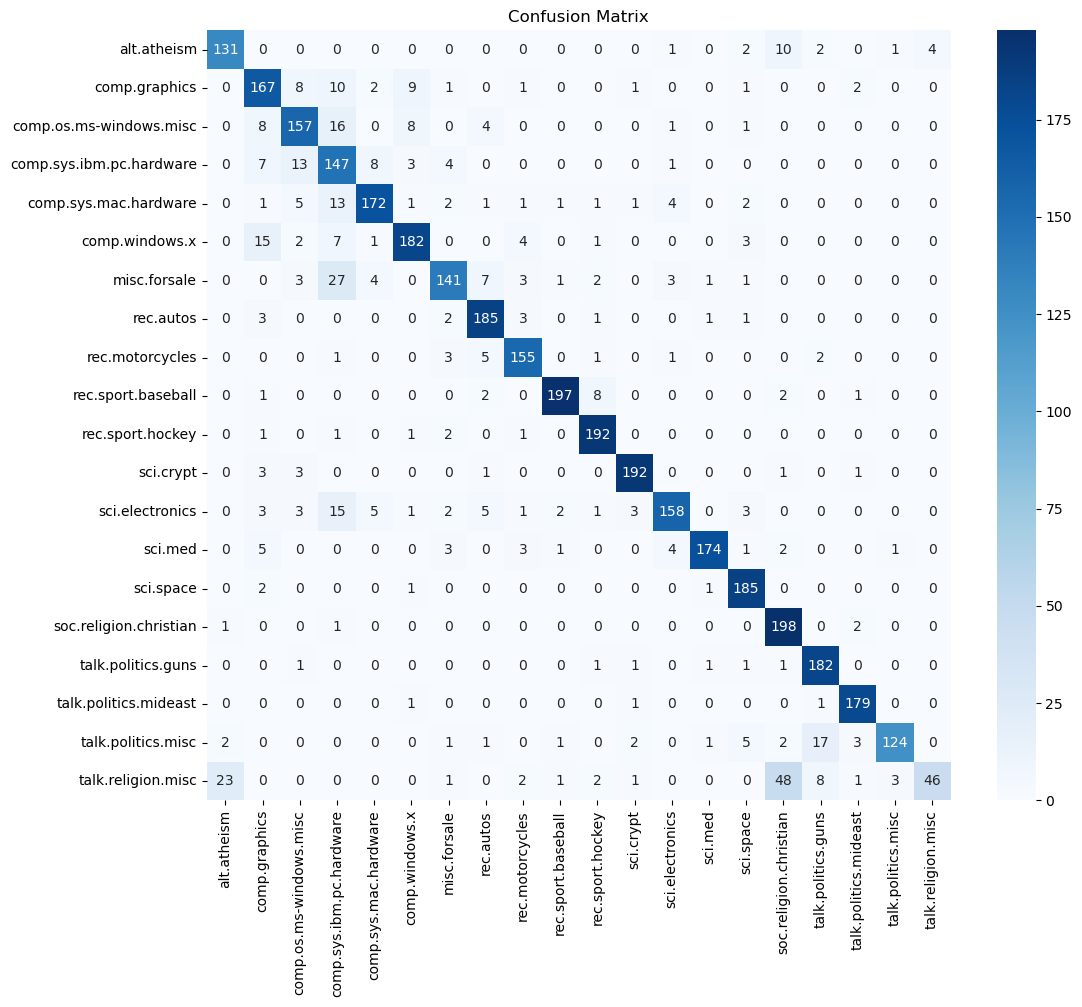

In [23]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=categories, yticklabels=categories, cmap='Blues')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Confusion Matrix")
plt.show()

In [24]:
joblib.dump(model, "newsgroups_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print("Model and vectorizer saved!")

Model and vectorizer saved!


In [25]:
new_texts = [
    "NASA launches a new mission to Mars", 
    "The new graphics card has amazing performance"
]
new_texts_clean = [preprocess(doc) for doc in new_texts]
new_texts_vect = tfidf.transform(new_texts_clean)
predictions = model.predict(new_texts_vect)

for text, pred in zip(new_texts, predictions):
    print(f"\nText: {text}")
    print(f"Predicted Category: {categories[pred]}")


Text: NASA launches a new mission to Mars
Predicted Category: sci.space

Text: The new graphics card has amazing performance
Predicted Category: comp.graphics
